In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import sklearn
import pandas as pd
import os, sys, time

import tensorflow as tf
from tensorflow import keras

import pprint

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

print(house.data.shape)
print(house.target.shape)

pprint.pprint(house.data[0:5])
pprint.pprint(house.target[0:5])

(20640, 8)
(20640,)
array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [3]:
#切分训练测试集
from sklearn.model_selection import train_test_split
#训练测试
x_train_all, x_test, y_train_all, y_test = train_test_split(house.data, house.target, random_state=7)
#验证集
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=7)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.fit_transform(x_test)
x_valid_scaler = scaler.fit_transform(x_valid)

In [14]:
#构建模型
print(x_train.shape[1:])
model = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]), #输入数据维数（8：）
                                 keras.layers.Dense(1)]) #输出为准确值，所以最后一层只出一个


(8,)


In [6]:
#这里用比较直观简单的均方误差来做损失
model.compile(loss = "mean_squared_error",optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
callback = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

history = model.fit(x_train_scaler, y_train, validation_data=(x_valid_scaler, y_valid), 
                    epochs=100, callbacks=callback)


Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 109us/sample - loss: 0.3146 - val_loss: 10.0744
Epoch 2/100
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3139 - val_loss: 9.9776
Epoch 3/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3099 - val_loss: 10.0591
Epoch 4/100
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3094 - val_loss: 10.2716
Epoch 5/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.3082 - val_loss: 10.6442
Epoch 6/100
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3074 - val_loss: 10.7183
Epoch 7/100
11610/11610 [==============================] - 1s 87us/sample - loss: 0.3198 - val_loss: 10.8771


In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

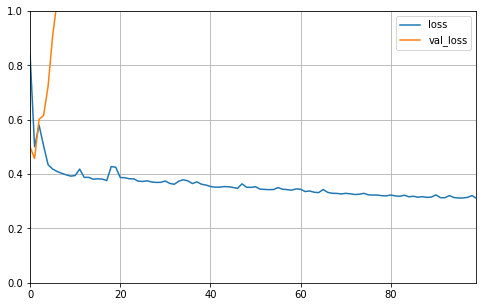

In [9]:
plot_learning_curves(history)